[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)


<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# Access ACTRIS Data throuth the ACTRIS Data Portal

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=02-in-situ/23_search_ACTRIS_data_portal_OC_EC.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/02-in-situ/23_search_ACTRIS_data_portal_OC_EC.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/02-in-situ/23_search_ACTRIS_data_portal_OC_EC.ipynb)

## Learning objectives

This notebook provides a step-by-step guide on how to access data through the ACTRIS (Aerosols, Clouds, and Trace gases Research Infrastructure) Data Portal. ACTRIS is a research infrastructure that aims to provide high-quality data on atmospheric composition and related processes.

In this notebook, participants will learn how to:

1. Access the ACTRIS Data Portal
2. Select the desired dataset
3. Specify the parameters for data download
4. Retrieve and download the data
5. Explore and analyze the downloaded data

By following this notebook, participants will gain the necessary skills to access and utilize the wealth of atmospheric data available through the ACTRIS Data Portal. This knowledge will enable them to conduct their own research and analysis in the field of atmospheric science.

Let's get started!

## Initial setup

Before we begin we must prepare our environment. This includes importing the various Python libraries that we will need.

### Import libraries

In [1]:
# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt

# Libraries for working with json files
import json

## Access the ACTRIS Data Portal, select the desired dataset and download *basket.json* file

You can access the ACTRIS Data Portal [here](https://data.actris.eu/search).

Through the search you can select datasets and add them to your basket by clicking the "Add selection to basket" button. When you have the desired data in your basket, you press the "Download all basket metadata" button. This gives you a *basket.json* file. 

![Screenshots of data search, data selection and basket with "Download all basket metadata" button from ACTRIS Data Portal](https://folk.nilu.no/~lemu/shared_presentations/actris_data_portal_search_select_basket.png)




## Explore downloaded data

This code section is opening a file named "basket.json" located in the "static" directory.

Here's a breakdown of what each line does:

1. f = open('static/basket.json'): This line opens the file "basket.json" using the open() function. The file is located in the "static" directory. The open() function returns a file object, which is assigned to the variable f. This allows us to perform operations on the file.
2. md = json.load(f): This line uses the json.load() function to load the contents of the file into a Python object. The json.load() function takes the file object f as an argument and returns a Python object that represents the JSON data in the file. In this case, the Python object is assigned to the variable md, which is a dictionary type. 

After executing these two lines of code, you can work with the contents of the JSON file using the md variable.

In [2]:
f = open('static/basket.json') # open the file "basket.json"
md = json.load(f) # load the json file

Lets have a look at the first element in the md variable 

In [3]:
first_element = next(iter(md)) # get the key to the first element of the dictionary
md[first_element] # get the metadata of the first element of the dictionary

{'id': 204487,
 'title': 'OC/EC at Birkenes',
 'matrix': 'aerosol particle phase',
 'instrumentType': 'low volume sampler',
 'station': 'Birkenes I',
 'startTime': '2001-02-06T23:00:00.0000000Z',
 'endTime': '2009-01-06T23:00:00.0000000Z',
 'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/QC/2T/UT/QC2T-UT7A.nc',
 'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/QC/2T/UT/QC2T-UT7A.nc',
 'variables': ['aerosol particle elemental carbon mass concentration',
  'aerosol particle organic carbon mass concentration',
  'aerosol particle total carbon mass concentration'],
 'pid': 'https://doi.org/10.48597/QC2T-UT7A',
 'repository': 'IN-SITU'}

Streaming data is done by accessing the 'opendapUrl' metadata element of each file. In this example this shown by the first element in the basket using the xarray package. 

In [4]:
ds = xr.open_dataset(md[first_element]['opendapUrl'])
ds

<xarray.Dataset>
Dimensions:                             (time: 762, tbnds: 2, metadata_time: 8,
                                         elemental_carbon_pm10_qc_flags: 2,
                                         elemental_carbon_pm25_qc_flags: 2,
                                         organic_carbon_pm10_qc_flags: 2,
                                         organic_carbon_pm25_qc_flags: 2,
                                         total_carbon_pm10_qc_flags: 2,
                                         total_carbon_pm25_qc_flags: 2)
Coordinates:
  * time                                (time) datetime64[ns] 2001-02-09T18:0...
  * metadata_time                       (metadata_time) datetime64[ns] 2001-0...
Dimensions without coordinates: tbnds, elemental_carbon_pm10_qc_flags,
                                elemental_carbon_pm25_qc_flags,
                                organic_carbon_pm10_qc_flags,
                                organic_carbon_pm25_qc_flags,
                                total_carbon_pm10_qc_flags,
                                total_carbon_pm25_qc_flags
Data variables: (12/20)
    time_bnds                           (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                  (metadata_time, tbnds) datetime64[ns] ...
    elemental_carbon_pm10               (time) float64 ...
    elemental_carbon_pm10_qc            (elemental_carbon_pm10_qc_flags, time) float64 ...
    elemental_carbon_pm10_ebasmetadata  (metadata_time) |S64 ...
    elemental_carbon_pm25               (time) float64 ...
    ...                                  ...
    total_carbon_pm10                   (time) float64 ...
    total_carbon_pm10_qc                (total_carbon_pm10_qc_flags, time) float64 ...
    total_carbon_pm10_ebasmetadata      (metadata_time) |S64 ...
    total_carbon_pm25                   (time) float64 ...
    total_carbon_pm25_qc                (total_carbon_pm25_qc_flags, time) float64 ...
    total_carbon_pm25_ebasmetadata      (metadata_time) |S64 ...
Attributes: (12/90)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         OC/EC at Birkenes
    keywords:                      mass_concentration_of_organic_carbon_in_pm...
    id:                            QC2T-UT7A.nc
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1",\n   ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

Depending on the type of data, the documentation for each file can be found here: https://data.actris.eu/docs 

Since this is an In-Situ dataset the documentation is found here: https://ebas.pages.nilu.no/ebas-io/fileformat_netcdf/index.html 

## Data processing

In [5]:
ds_elemental_carbon = []  # Create an empty list to store elemental carbon data
ds_organic_carbon = []  # Create an empty list to store organic carbon data
ds_total_carbon = []  # Create an empty list to store total carbon data

for i in md:  # Iterate over the keys in the 'md' dictionary
    ds = xr.open_dataset(md[i]['opendapUrl'])  # Open the dataset using the 'opendapUrl' from the metadata
    
    for j in list(ds.data_vars.keys()):  # Iterate over the variables in the dataset
        attrs = ds[j].attrs  # Get the attributes of the variable
        
        # Check if the variable is elemental carbon with specific attributes
        if attrs.get('standard_name') == 'mass_concentration_of_elemental_carbon_in_pm10_in_air' and \
           attrs.get('ebas_statistics') == 'arithmetic mean' and \
           attrs.get('units') == 'ug C/m3':
            ds_elemental_carbon.append(ds[j])  # Add the variable to the elemental carbon list
        
        # Check if the variable is organic carbon with specific attributes
        elif attrs.get('standard_name') == 'mass_concentration_of_organic_carbon_in_pm10_in_air' and \
             attrs.get('ebas_statistics') == 'arithmetic mean' and \
             attrs.get('units') == 'ug C/m3':
            if 'Fraction' not in ds[j].dims and 'Fractionx' not in ds[j].dims and 'Fractionxx' not in ds[j].dims:
                ds_organic_carbon.append(ds[j])  # Add the variable to the organic carbon list
        
        # Check if the variable is total carbon with specific attributes
        elif attrs.get('standard_name') == 'mass_concentration_of_total_carbon_in_pm10_in_air' and \
             attrs.get('ebas_statistics') == 'arithmetic mean' and \
             attrs.get('units') == 'ug C/m3':
            ds_total_carbon.append(ds[j])  # Add the variable to the total carbon list

In [6]:
# Sort the ds_elemental_carbon list based on the first time value in each DataArray
ds_elemental_carbon.sort(key=lambda x: x.time.values[0] if len(x.time) > 0 else np.datetime64('NaT'))

# Sort the ds_organic_carbon list based on the first time value in each DataArray
ds_organic_carbon.sort(key=lambda x: x.time.values[0] if len(x.time) > 0 else np.datetime64('NaT'))

# Sort the ds_total_carbon list based on the first time value in each DataArray
ds_total_carbon.sort(key=lambda x: x.time.values[0] if len(x.time) > 0 else np.datetime64('NaT'))

In [7]:
# Concatenate the list of DataArrays in ds_elemental_carbon along the 'time' dimension
ec_ds = xr.concat([ds for ds in ds_elemental_carbon], dim='time')

# Concatenate the list of DataArrays in ds_organic_carbon along the 'time' dimension
oc_ds = xr.concat([ds for ds in ds_organic_carbon], dim='time')

# Concatenate the list of DataArrays in ds_total_carbon along the 'time' dimension
tc_ds = xr.concat([ds for ds in ds_total_carbon], dim='time')


## Data visualisation

Using matplotlib to create a timeseries plot of elemental carbon and organic carbon at Birkenes 

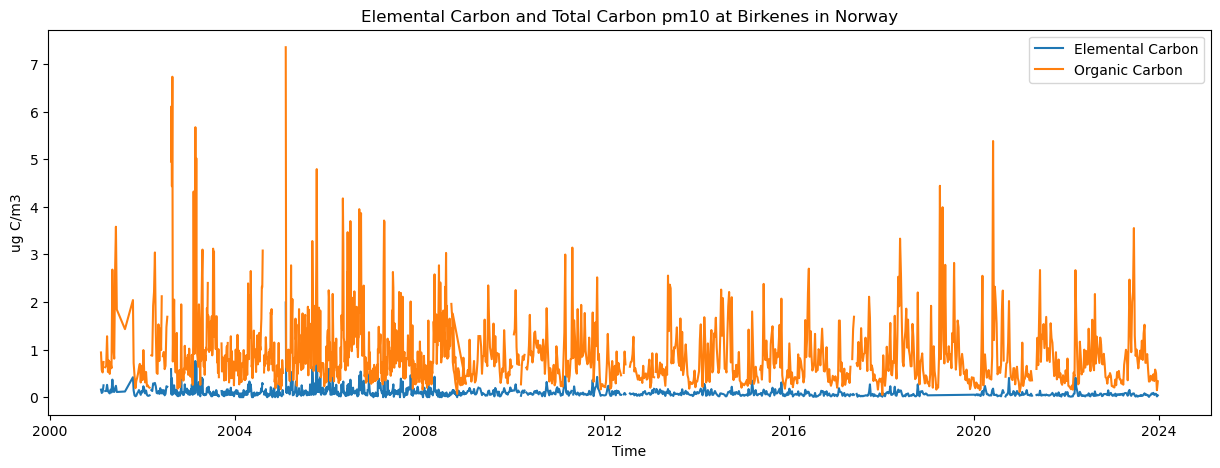

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(ec_ds.time, ec_ds, label='Elemental Carbon')
plt.plot(oc_ds.time, oc_ds, label='Organic Carbon')
#plt.plot(tc_ds.time, tc_ds, label='Total Carbon')
plt.legend()
plt.ylabel('ug C/m3')
plt.xlabel('Time')
plt.title('Elemental Carbon and Total Carbon pm10 at Birkenes in Norway')
plt.show()

## Take home messages

1. The notebook provides a guide on how to access data through the ACTRIS Data Portal.
2. Participants will learn how to select the desired dataset, specify parameters for data download, retrieve and download the data, and explore and analyze the downloaded data.
3. The notebook demonstrates how to open and explore a JSON file containing metadata for the selected datasets.
4. The notebook provides code examples for concatenating and visualizing the data using matplotlib.
